# Part 3 Decision Tree Model

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

plt.rcParams['figure.dpi']= 150
sns.set(style="whitegrid")

## Split training data into training dataset and validation dataset

In [2]:
# Read cleaned training data
data = pd.read_csv("cleaned_train_data.csv")

# It is better to choose random_state=42
# Split training data into 80% training data and 20% validation data
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

X_train = train.comment_text
X_test = test.comment_text

train.shape:  (127656, 8)
test.shape:  (31915, 8)


In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
140030,ed56f082116dcbd0,grandma terri should burn in trash grandma ter...,1,0,0,0,0,0
159124,f8e3cd98b63bf401,may etc it would be easiest if you were to adm...,0,0,0,0,0,0
60006,a09e1bcf10631f9a,the objectivity of this discussion is doubtful...,0,0,0,0,0,0
65432,af0ee0066c607eb8,shelly shock shelly shock is,0,0,0,0,0,0
154979,b734772b1a807e09,i do not care refer to on ten hong talk page i...,0,0,0,0,0,0


In [4]:
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,7ca72b5b9c688e9e,geez are you forgetful weave already discussed...,0,0,0,0,0,0
131631,c03f72fd8f8bf54f,carioca fra thanks for your support on my requ...,0,0,0,0,0,0
125326,9e5b8e8fc1ff2e84,birthday no worries its what i do enjoy or day...,0,0,0,0,0,0
111256,5332799e706665a6,pseudoscience category i'm assuming that this ...,0,0,0,0,0,0
83590,dfa7d8f0b4366680,and if such phrase exists it would be provided...,0,0,0,0,0,0


## Search for max_depth for decision tree in order to avoid overfitting

In [5]:
tfidfVec = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidfVec.fit_transform(X_train)
X_test_tfidf = tfidfVec.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(127656, 56192)
(31915, 56192)


In [6]:
train_scores = []
test_scores = []
for dep in range(5, 100, 10):
    clf = DecisionTreeClassifier(criterion="gini", max_depth=dep).fit(X_train_tfidf, train["toxic"])
    train_score = classification_report(train["toxic"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["toxic"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [7]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 100, 10)], columns=["max_depth"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 100, 10)], columns=["max_depth"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

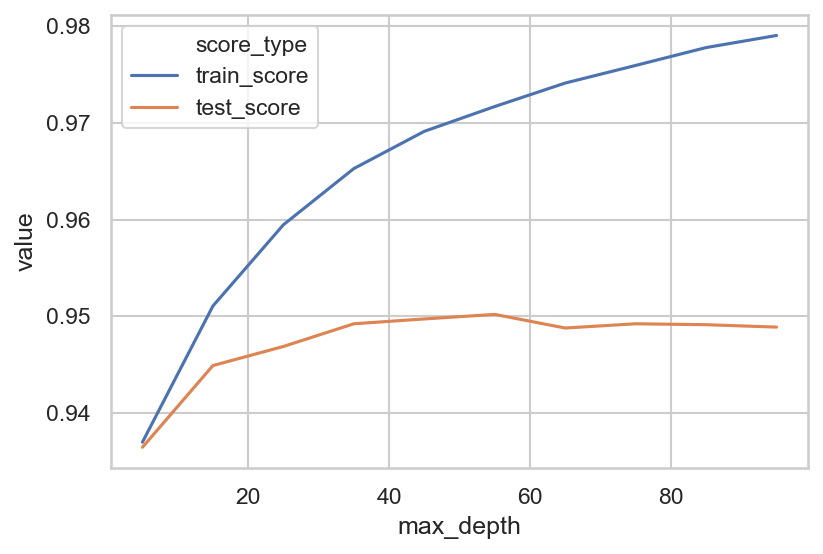

In [8]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="max_depth", y="value", hue="score_type", data=score_df)

In [9]:
train_scores = []
test_scores = []
for dep in range(3, 20, 1):
    clf = DecisionTreeClassifier(criterion="gini", max_depth=dep).fit(X_train_tfidf, train["severe_toxic"])
    train_score = classification_report(train["severe_toxic"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["severe_toxic"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [10]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(3, 20, 1)], columns=["max_depth"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(3, 20, 1)], columns=["max_depth"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

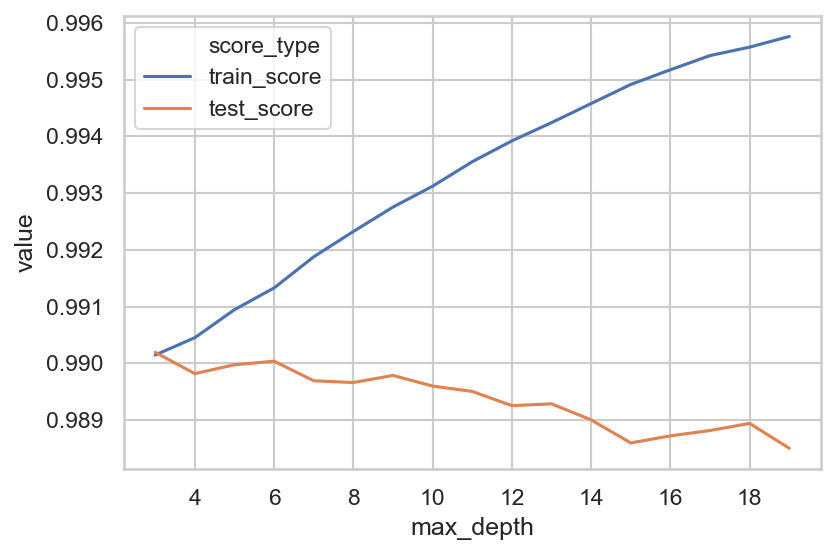

In [11]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="max_depth", y="value", hue="score_type", data=score_df)

In [12]:
train_scores = []
test_scores = []
for dep in range(5, 50, 5):
    clf = DecisionTreeClassifier(criterion="gini", max_depth=dep).fit(X_train_tfidf, train["obscene"])
    train_score = classification_report(train["obscene"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["obscene"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [13]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 50, 5)], columns=["max_depth"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 50, 5)], columns=["max_depth"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

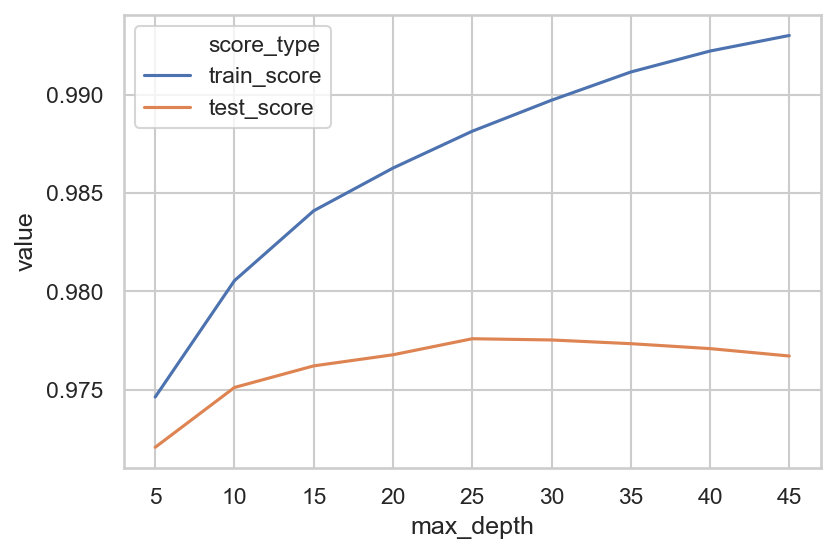

In [14]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="max_depth", y="value", hue="score_type", data=score_df)

In [15]:
train_scores = []
test_scores = []
for dep in range(5, 30, 1):
    clf = DecisionTreeClassifier(criterion="gini", max_depth=dep).fit(X_train_tfidf, train["threat"])
    train_score = classification_report(train["threat"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["threat"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [16]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 30, 1)], columns=["max_depth"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 30, 1)], columns=["max_depth"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

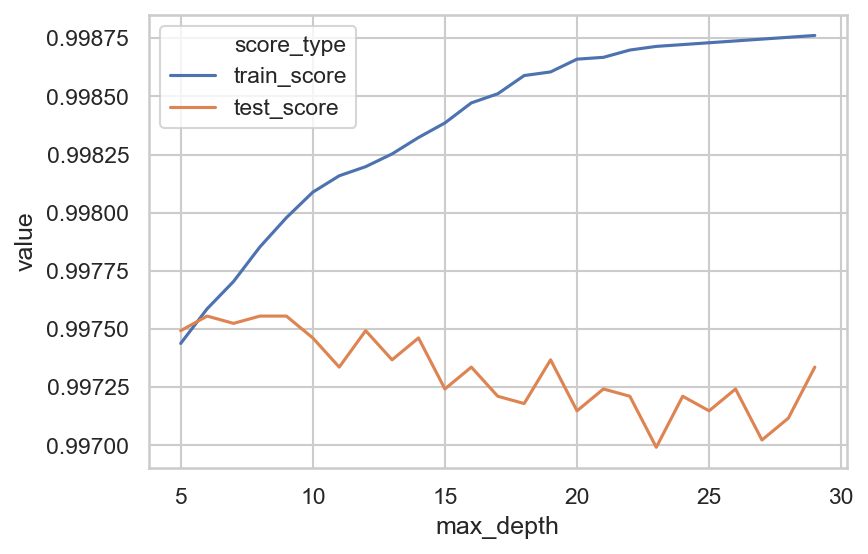

In [17]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="max_depth", y="value", hue="score_type", data=score_df)

In [18]:
train_scores = []
test_scores = []
for dep in range(5, 50, 5):
    clf = DecisionTreeClassifier(criterion="gini", max_depth=dep).fit(X_train_tfidf, train["insult"])
    train_score = classification_report(train["insult"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["insult"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [19]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 50, 5)], columns=["max_depth"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 50, 5)], columns=["max_depth"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

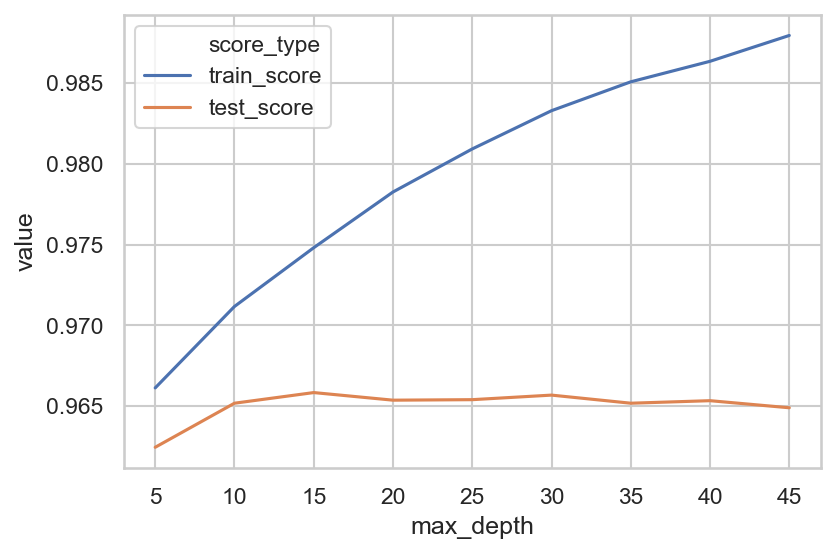

In [20]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="max_depth", y="value", hue="score_type", data=score_df)

In [21]:
train_scores = []
test_scores = []
for dep in range(5, 50, 5):
    clf = DecisionTreeClassifier(criterion="gini", max_depth=dep).fit(X_train_tfidf, train["identity_hate"])
    train_score = classification_report(train["identity_hate"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["identity_hate"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [22]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 50, 5)], columns=["max_depth"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(5, 50, 5)], columns=["max_depth"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

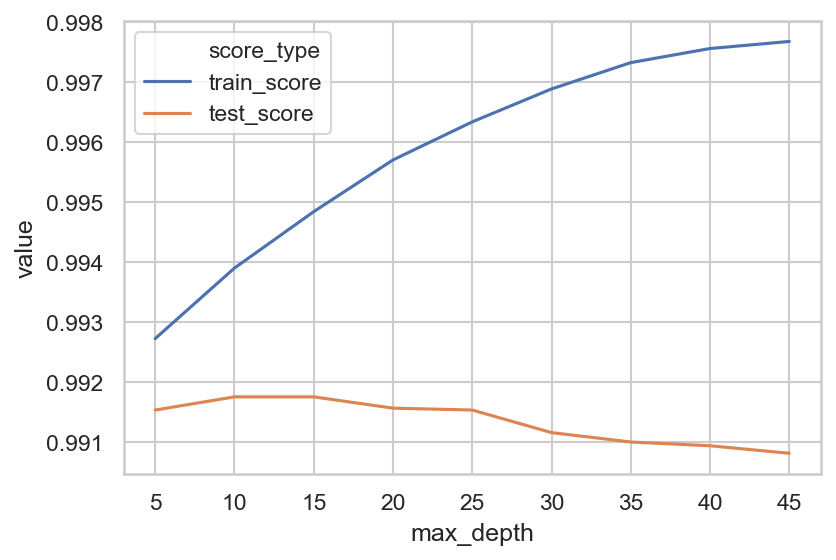

In [23]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="max_depth", y="value", hue="score_type", data=score_df)

## Using cross validation to estimate Decision Tree model with Gini

In [24]:
# sava max_depth parameter for each category
categories = {'toxic': 55, 'severe_toxic': 6, 'obscene': 25, 'threat': 6, 'insult': 15, 'identity_hate': 11}

fold = 10
results = pd.DataFrame()
cross_validation_score_name = ['roc_auc']

for category in categories:
    # initialise decision tree classifier
    clf = make_pipeline(TfidfVectorizer(stop_words="english"), DecisionTreeClassifier(criterion="gini", max_depth=categories[category]))
    scores = cross_validate(clf, X_train, train[category], cv=fold, scoring="roc_auc", n_jobs=3)
    result = pd.DataFrame()
    for scn in cross_validation_score_name:
        result = result.append(pd.DataFrame(np.array([scores["test_score"],[scn]*fold]).T, columns=["value", "score_name"]), ignore_index=True)    
    cate = pd.DataFrame([category]*(len(cross_validation_score_name)*fold), columns=['category'])
    results = results.append(pd.concat([result, cate], axis=1), ignore_index=True)

results.head()

,value,score_name,category
0,0.7827995765394472,roc_auc,toxic
1,0.7491102047877432,roc_auc,toxic
2,0.780042382863155,roc_auc,toxic
3,0.7681140800916914,roc_auc,toxic
4,0.7900039058828059,roc_auc,toxic


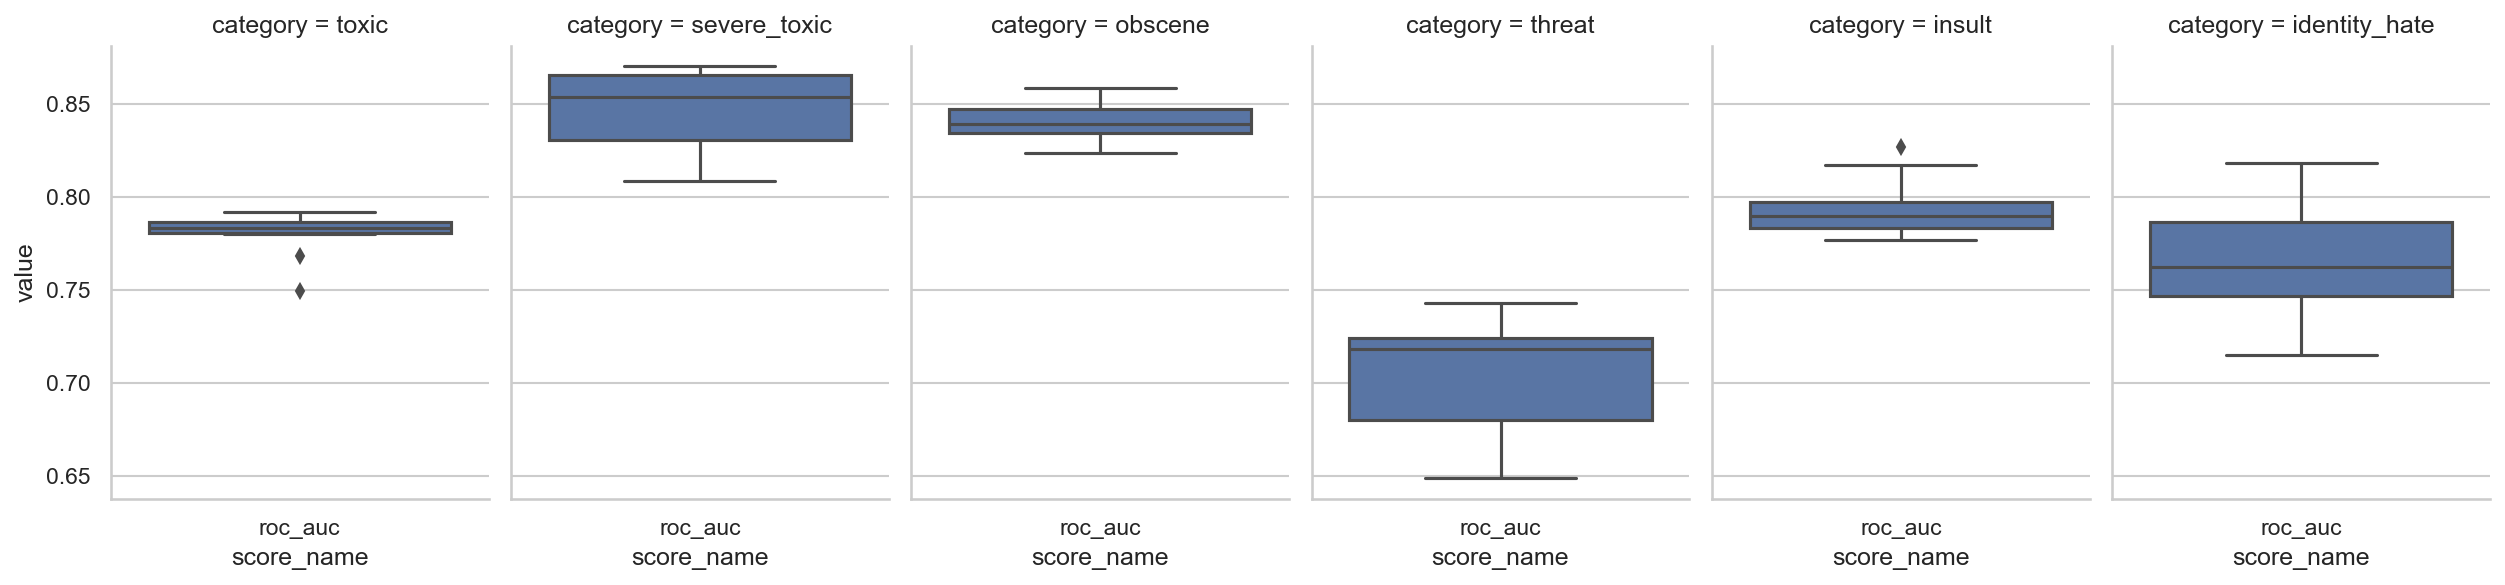

In [25]:
results["value"] = results.value.astype(float)
ax = sns.catplot(x="score_name", y="value", col="category", data=results, kind="box", height=4, aspect=.7);

In [26]:
result = pd.concat([results,pd.DataFrame(["decisionTree_cross_validation_gini"]*60, columns=["param"])], axis=1)

In [27]:
result.to_csv("decisionTree_cross_validation_gini.csv", index=False)

In [28]:
result_entropy = pd.read_csv("decisionTree_cross_validation.csv")

In [45]:
compare = result_entropy.append(result, ignore_index=True)

In [47]:
compare["param"] = compare["param"].apply(lambda x: "entropy" if x == "decisionTree_cross_validation" else "gini")

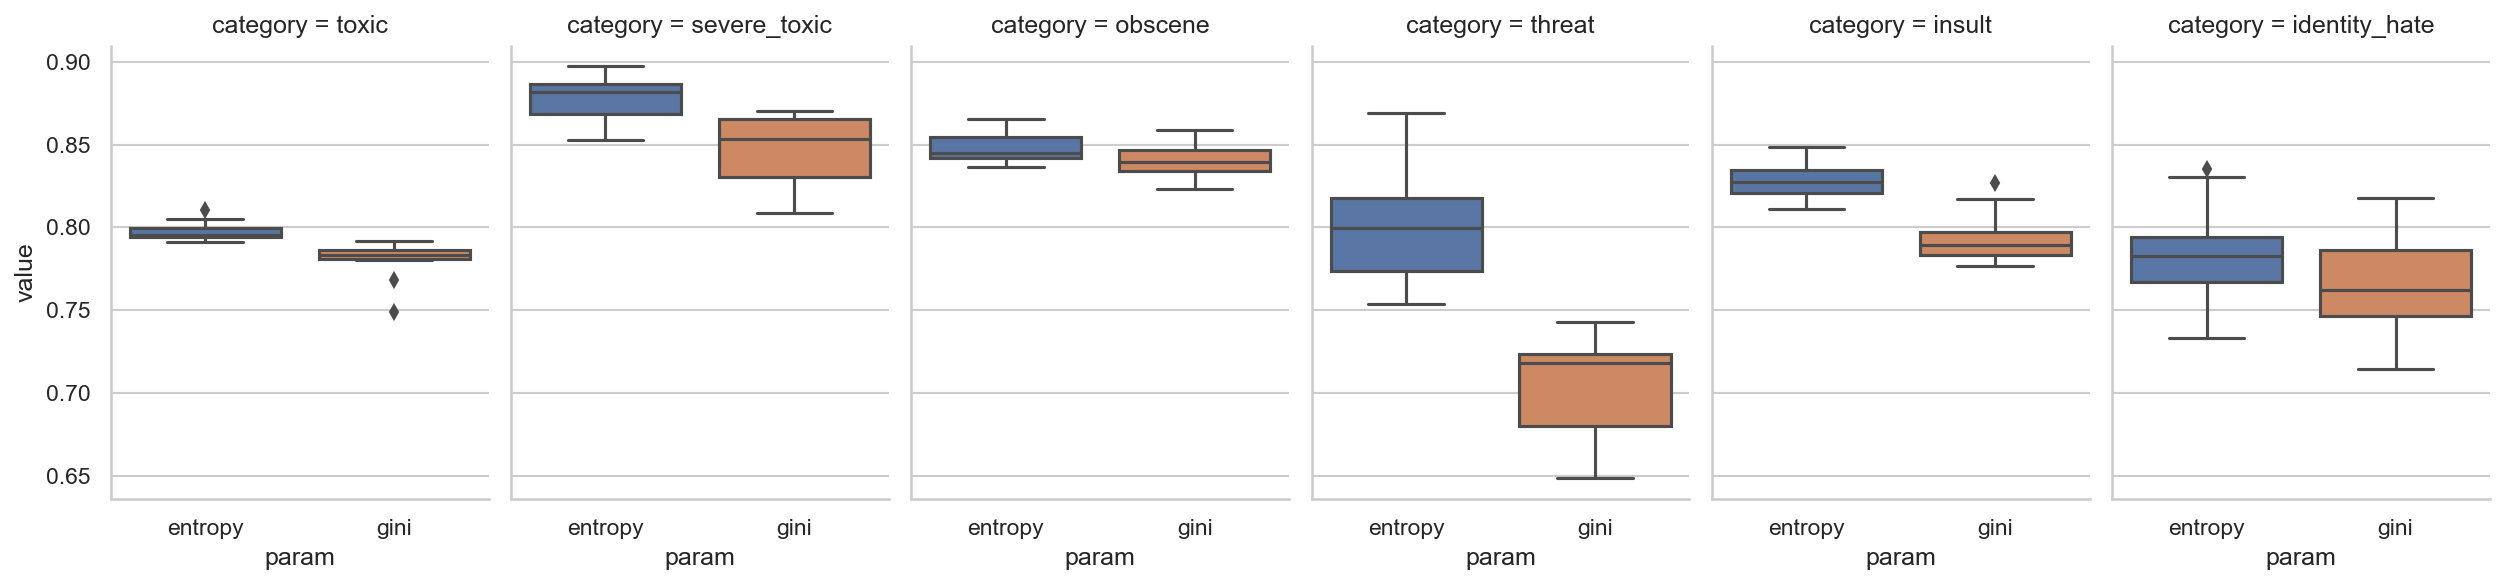

In [49]:
# compare["value"] = results.value.astype(float)
ax = sns.catplot(x="param", y="value", col="category", data=compare, kind="box", height=4, aspect=.7);